**<center><h1>Collaborative Article Generation with CrewAI: A Multi-Agent Approach</h1></center>**

In this section, we will explore the concept of agents and their tasks within the framework of multi-agent systems. Agents are autonomous entities designed to perform specific functions, collaborate, and solve problems in a dynamic environment. This notebook is an application of a part from the [Multi AI Agent Systems with CrewAI](https://www.deeplearning.ai/short-courses/multi-ai-agent-systems-with-crewai/) course offered by **DeepLearning AI** and **CrewAI**. Through practical examples, we will delve into how agents work together as a crew to achieve complex objectives efficiently.

## **Table of Contents**

* [Step 1. Agents, Tasks, and Crew of Agents : A Comprehensive Overview](#h1)

* [Step 2. Install Libraries](#h2)

* [Step 3. Import Libraries](#h3)

* [Step 4. Define Agents](#h4)

* [Step 5. Define Tasks](#h5)

* [Step 6. Creating the Crew](#h6)

* [Step 7. Running the Crew](#h7)

## **Step 1. Agents, Tasks, and Crew of Agents : A Comprehensive Overview** <a class="anchor"  id="h1"></a>

#### **Agents**

Agents are large language models (LLMs) designed to autonomously perform tasks, make decisions, and communicate with other agents. They feature an inner thought process that enables them to "talk to themselves", allowing them to analyze, refine, and adapt their responses, which can be called a `reasoning process`. By receiving tasks and using various tools, agents can generate highly complex answers and solutions beyond typical response generation.

#### **Tasks**
In the CrewAI framework, a Task is a specific assignment completed by an Agent. It includes essential details for execution, such as a description, the responsible agent, and required tools, allowing for a variety of action complexities.

Tasks in CrewAI can be collaborative, requiring multiple agents to work together. This collaboration is managed through task properties and orchestrated by the Crew’s process, enhancing teamwork and efficiency.

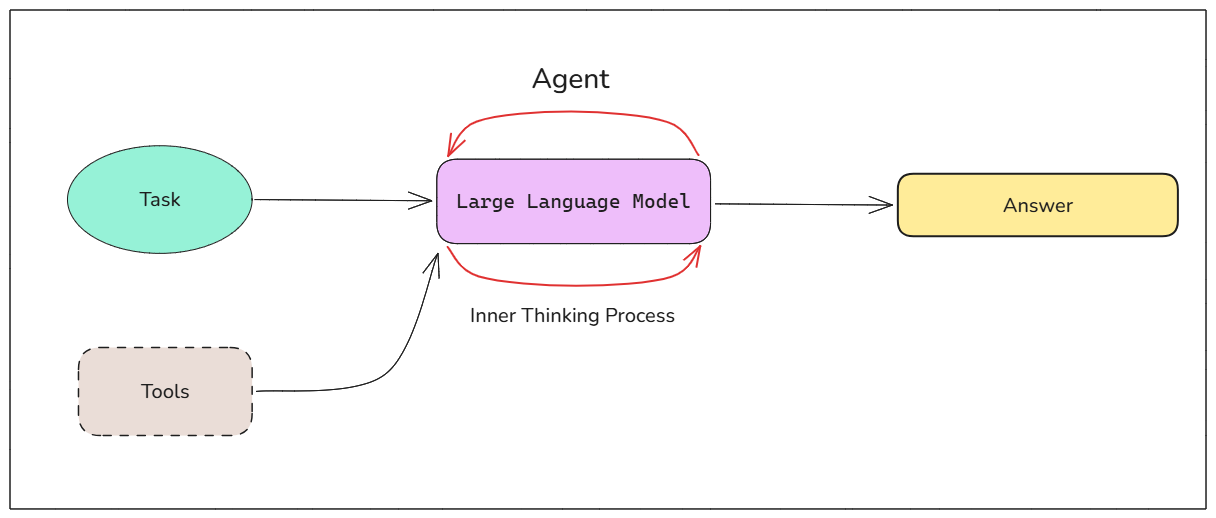

#### **Crew**

In CrewAI, a `crew` represents a collaborative group of agents working together to achieve a defined set of tasks. Each crew outlines the strategy for task execution, agent collaboration, and the overall workflow. This system allows for the interconnection of multiple agents, enabling one agent to pass tasks to another, facilitating a seamless and efficient collaborative process.

## **Step 2. Install Libraries** <a class="anchor"  id="h2"></a>

In [1]:
%%capture
! pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29 

## **Step 3. Import Libraries** <a class="anchor"  id="h3"></a>

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

CrewAI uses `gpt-4o-mini` by default but also supports other LLM providers. In our case, we will be using `Llama3.1-8b` by Groq-AI.

In [3]:
from crewai import Agent, Task, Crew
import os

os.environ["OPENAI_API_KEY"] = "***************************************"
os.environ["OPENAI_API_BASE"] = "https://api.groq.com/openai/v1"
os.environ["OPENAI_MODEL_NAME"] = "llama-3.1-8b-instant"

## **Step 4. Define Agents** <a class="anchor"  id="h4"></a>

- Define your Agents, and provide them a role, goal and backstory.
- It has been seen that LLMs perform better when they are role playing.

### **Agent : Planner**

In [4]:
planner = Agent(
    # Role : Defines the agent’s function within the crew. It determines the kind of tasks the agent is best suited for.
    role="Content Planner",
    # Goal : The individual objective that the agent aims to achieve. It guides the agent’s decision-making process.
    goal="Plan engaging and factually accurate content on {topic}",
    # Backstory : Provides context to the agent’s role and goal, enriching the interaction and collaboration dynamics.
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False, # Agents can delegate tasks or questions to one another, ensuring that each task is handled by the most suitable agent.
    verbose=True
)

### **Agent : Writer**

In [5]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True
)

### **Agent : Editor**

In [6]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True
)

## **Step 5. Define Tasks** <a class="anchor"  id="h5"></a>

Define your Tasks, and provide them a description, expected_output and agent.

### **Task: Plan**

In [7]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

### **Task: Write**

In [8]:
write = Task(
    # Description : A clear, concise statement of what the task entails.
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
        "3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    # Expected Output : A detailed description of what the task’s completion looks like.
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    # Agent : The agent responsible for the task, assigned either directly or by the crew’s process.
    agent=writer,
)

### **Task: Edit**

In [9]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

## **Step 6. Creating the Crew** <a class="anchor"  id="h6"></a>

- Create your crew of Agents
- Pass the tasks to be performed by those agents.
    - **Note**: For this simple example, the tasks will be performed sequentially (i.e they are dependent on each other), so the order of the task in the list matters.
- verbose=2 allows you to see all the logs of the execution.

In [10]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=2
)

## **Step 7. Running the Crew** <a class="anchor"  id="h7"></a>

In [11]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

 [DEBUG]: == Working Agent: Content Planner
 [INFO]: == Starting Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


> Entering new CrewAgentExecutor chain...
Thought: I now can give a great answer

Action: 
Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.

Action Input: 
Here's a list of the latest trends, key players, and noteworthy news on Artificial Intelligence:

**Latest Trends:**

1. **Explainable AI (XAI):** The trend of making AI more transparent and explainable to build trust in its decision-making processes.
2. **Edge AI:** The increasing use of AI at the edge of the network, closer to the source of the data, to reduce latency and improve real-time processin

In [12]:
from IPython.display import Markdown
Markdown(result)

**The Rise of Artificial Intelligence: Trends, Players, and News**

As we navigate the complexities of the 21st century, one thing is clear: Artificial Intelligence (AI) is no longer a futuristic concept, but a rapidly evolving reality. From powering virtual assistants to transforming industries, AI has become an integral part of our lives. In this article, we'll delve into the latest trends, key players, and noteworthy news in AI, exploring its vast potential and implications.

To stay ahead of the curve, it's essential to understand the current state of AI and its applications. AI has revolutionized the way we live and work, offering unparalleled efficiency, accuracy, and innovation. From self-driving cars to personalized medicine, AI has the potential to transform industries and improve lives. As AI continues to advance, it's crucial to stay informed about the latest trends, key players, and noteworthy news in this rapidly evolving field.

**The Importance of AI in Today's World**

AI has the potential to transform industries and improve lives, but it also raises important questions about its impact on society. As AI becomes more pervasive, there's a growing need to understand how it makes decisions and ensure that it is developed and used responsibly. This requires a multidisciplinary approach, involving experts from various fields, including computer science, ethics, and social sciences.

Moreover, AI has the potential to exacerbate existing social inequalities, particularly in terms of access to education and job opportunities. As AI takes on more complex tasks, there's a growing risk of job displacement, particularly for low-skilled workers. To mitigate this risk, it's essential to invest in education and retraining programs that equip workers with the skills they need to succeed in an AI-driven economy.

**Latest Trends in AI: Exploring the Future**

### Explainable AI (XAI)

As AI becomes increasingly pervasive, there's a growing need to understand how it makes decisions. XAI aims to provide transparency and accountability in AI decision-making, ensuring that we can trust the outcomes. By developing more transparent and explainable AI systems, we can build trust in AI and its applications.

XAI involves using techniques such as model interpretability and feature attribution to provide insights into how AI systems make decisions. This can help identify potential biases and errors in AI decision-making, ensuring that AI systems are fair and unbiased.

### Edge AI

With the rise of IoT devices, Edge AI has emerged as a powerful solution for processing data in real-time, reducing latency and improving performance. Edge AI involves processing data at the edge of the network, rather than in the cloud, allowing for faster and more efficient processing.

Edge AI has numerous applications, including smart homes, cities, and industries. By processing data in real-time, Edge AI can enable more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Human-AI Collaboration

As AI takes on more complex tasks, collaboration between humans and AI systems is becoming increasingly important. Human-AI collaboration enables us to leverage the strengths of both humans and AI, leading to improved outcomes and efficiency.

Human-AI collaboration involves designing AI systems that are transparent, explainable, and accountable. By providing insights into how AI systems make decisions, we can build trust in AI and its applications, enabling more effective collaboration between humans and AI.

### AI Ethics

As AI becomes more autonomous, there's a growing need to address the ethics of AI development and deployment. AI ethics involves considering the potential consequences of AI on society and ensuring that AI is developed and used responsibly.

AI ethics requires a multidisciplinary approach, involving experts from various fields, including computer science, ethics, and social sciences. By developing more transparent and explainable AI systems, we can build trust in AI and its applications, ensuring that AI is developed and used responsibly.

### Quantum AI

The integration of quantum computing and AI has the potential to revolutionize the field, enabling faster processing and more accurate results. Quantum AI involves using quantum computing to speed up AI processing, enabling more complex and accurate calculations.

Quantum AI has numerous applications, including optimization problems, machine learning, and cryptography. By leveraging the power of quantum computing, we can enable more efficient and effective AI processing, leading to improved outcomes and innovation.

**Key Players in AI: Leaders and Innovators**

In the rapidly evolving field of AI, several key players are driving innovation and pushing the boundaries of what's possible with AI. Here are some of the leading players in AI:

### Google

Google's AI Research Lab has been a driving force in AI innovation, pushing the boundaries of what's possible with AI. Google's AI Research Lab has made significant contributions to AI research, including the development of AlphaGo and BERT.

Google's AI-powered products, such as Google Assistant and Google Cloud AI Platform, have transformed the way we interact with technology. By leveraging the power of AI, Google is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Microsoft

Microsoft's AI-powered Azure has enabled businesses to leverage AI in the cloud, making AI more accessible and scalable. Microsoft's AI-powered Azure has numerous applications, including machine learning, natural language processing, and computer vision.

Microsoft's AI-powered products, such as Microsoft Cognitive Services and Microsoft Bot Framework, have transformed the way we interact with technology. By leveraging the power of AI, Microsoft is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Amazon

Amazon's AI-powered Alexa has transformed the smart home industry, demonstrating the potential of AI in consumer applications. Amazon's AI-powered Alexa has numerous applications, including voice recognition, natural language processing, and smart home automation.

Amazon's AI-powered products, such as Amazon SageMaker and Amazon Comprehend, have transformed the way we interact with technology. By leveraging the power of AI, Amazon is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Facebook

Facebook's AI Research Lab has made significant contributions to AI research, including the development of natural language processing and computer vision. Facebook's AI-powered products, such as Facebook Portal and Facebook Watch, have transformed the way we interact with technology.

By leveraging the power of AI, Facebook is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes. Facebook's AI-powered products have numerous applications, including social media, e-commerce, and entertainment.

### NVIDIA

NVIDIA's AI Computing Hardware has enabled faster and more efficient AI processing, making it possible to train and deploy AI models at scale. NVIDIA's AI-powered products, such as NVIDIA Tesla V100 and NVIDIA DGX-1, have transformed the way we interact with technology.

By leveraging the power of AI, NVIDIA is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes. NVIDIA's AI-powered products have numerous applications, including machine learning, natural language processing, and computer vision.

**Noteworthy News in AI: Innovation and Impact**

### Google's AI Research Lab

Google's AI Research Lab has made significant contributions to AI innovation, from AlphaGo to BERT. Google's AI Research Lab has numerous applications, including machine learning, natural language processing, and computer vision.

Google's AI-powered products, such as Google Assistant and Google Cloud AI Platform, have transformed the way we interact with technology. By leveraging the power of AI, Google is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Microsoft's AI-powered Azure

Microsoft's AI-powered Azure has enabled businesses to leverage AI in the cloud, making AI more accessible and scalable. Microsoft's AI-powered Azure has numerous applications, including machine learning, natural language processing, and computer vision.

Microsoft's AI-powered products, such as Microsoft Cognitive Services and Microsoft Bot Framework, have transformed the way we interact with technology. By leveraging the power of AI, Microsoft is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Amazon's AI-powered Alexa

Amazon's AI-powered Alexa has transformed the smart home industry, demonstrating the potential of AI in consumer applications. Amazon's AI-powered Alexa has numerous applications, including voice recognition, natural language processing, and smart home automation.

Amazon's AI-powered products, such as Amazon SageMaker and Amazon Comprehend, have transformed the way we interact with technology. By leveraging the power of AI, Amazon is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes.

### Facebook's AI Research Lab

Facebook's AI Research Lab has made significant contributions to AI research, including the development of natural language processing and computer vision. Facebook's AI-powered products, such as Facebook Portal and Facebook Watch, have transformed the way we interact with technology.

By leveraging the power of AI, Facebook is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes. Facebook's AI-powered products have numerous applications, including social media, e-commerce, and entertainment.

### NVIDIA's AI Computing Hardware

NVIDIA's AI Computing Hardware has enabled faster and more efficient AI processing, making it possible to train and deploy AI models at scale. NVIDIA's AI-powered products, such as NVIDIA Tesla V100 and NVIDIA DGX-1, have transformed the way we interact with technology.

By leveraging the power of AI, NVIDIA is enabling more efficient and effective decision-making, reducing the risk of errors and improving outcomes. NVIDIA's AI-powered products have numerous applications, including machine learning, natural language processing, and computer vision.

**Conclusion and Call to Action**

As AI continues to evolve and transform industries, it's essential to stay informed about the latest trends, key players, and noteworthy news in this rapidly evolving field. We encourage readers to explore the resources listed in this article and share their thoughts and experiences with AI in the comments section below.

By working together, we can unlock the full potential of AI and create a brighter future for all. We must invest in education and retraining programs that equip workers with the skills they need to succeed in an AI-driven economy. We must also develop more transparent and explainable AI systems, ensuring that AI is developed and used responsibly.

Together, we can create a future where AI is used to improve lives, not just profit margins.

**Appendix A: AI Glossary**

* AI: Artificial Intelligence
* XAI: Explainable AI
* Edge AI: Artificial Intelligence on the Edge
* Human-AI Collaboration: Collaboration between humans and AI systems
* AI Ethics: The ethics of AI development and deployment
* Quantum AI: The integration of quantum computing and AI

**Appendix B: AI Resources**

* Google's AI Research Lab: [Source: Google's AI Research Lab website]
* Microsoft's AI-powered Azure: [Source: Microsoft's Azure website]
* Amazon's AI-powered Alexa: [Source: Amazon's Alexa website]
* Facebook's AI Research Lab: [Source: Facebook's AI Research Lab website]
* NVIDIA's AI Computing Hardware: [Source: NVIDIA's AI Computing Hardware website]

**Appendix C: AI Timeline**

* 1950s: The Dartmouth Summer Research Project on Artificial Intelligence
* 1960s: The development of the first AI programs
* 1980s: The rise of expert systems
* 1990s: The development of machine learning and deep learning
* 2000s: The rise of AI in consumer applications
* 2010s: The emergence of AI as a major industry

**References**

* [1] Google's AI Research Lab website
* [2] Microsoft's Azure website
* [3] Amazon's Alexa website
* [4] Facebook's AI Research Lab website
* [5] NVIDIA's AI Computing Hardware website